# 边缘检测

| 更新时间 | 负责人 | 内容 | 备注 |
| --- | --- | --- | --- |
| 2021年12月2日 | Rui | 初次编写文档 | ---- |
| 2022年12月15日 | Rui | 修改文档的编写方式 | 使用 Jupyter notebook 进行编写文档 |
| 2022年1月18日 | Rui | 修改文档，增加效果图 | 通过测试的平台有 MaixII-Dock，使用的是 MaixPy3 0.4.0 |


通过(卷积/conv)实现 sobel(索贝尔) 边缘检测（目前是只能在 MaixII-Dock 上进行部署）

## 运行效果

![](./../asserts/sobel_v831.jpg)

<iframe src="//player.bilibili.com/player.html?aid=808373936&bvid=BV1F34y1q7TB&cid=487496493&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

## 准备

- 在 [MaixHub](https://www.maixhub.com/modelInfo?modelId=24) 上获取模型文件和运行源码（最新版本的系统内置了模型文件 `/home/model/sobel_int8.*`）
- 确认 MaixPy3 版本为 0.4.0 以上
- 使用的硬件为 MaixII-Dock
- 内存卡内是最新版本的镜像系统
- 插卡启动硬件

## 边缘检测

读取模型文件，并部署到 MaixII-Dock 上

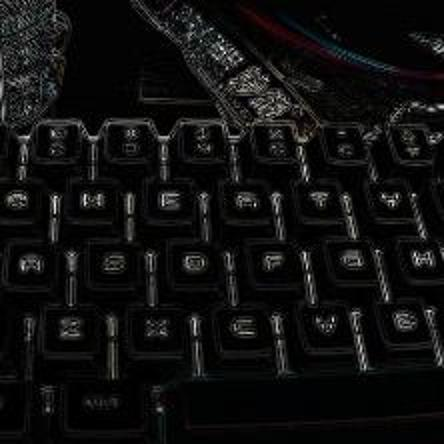


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import nn, camera, display, image
import numpy as np
import time
model = {
    "param": "/home/model/sobel_int8.param",
    "bin": "/home/model/sobel_int8.bin"
}

input_size = (224, 224, 3)
output_size = (222, 222, 3)

options = {
    "model_type":  "awnn",
    "inputs": {
        "input0": input_size
    },
    "outputs": {
        "output0": output_size
    },
    "mean": [127.5, 127.5, 127.5],
    "norm": [0.0078125, 0.0078125, 0.0078125],
}
print("-- load model:", model)
m = nn.load(model, opt=options)
print("-- load ok")

while True:
    img = camera.capture().resize(224,224)
    out = m.forward(img.tobytes(), quantize=True, layout="hwc")
    out = out.astype(np.float32).reshape(output_size)
    out = (np.ndarray.__abs__(out) * 255 / out.max()).astype(np.uint8)
    data = out.tobytes()
    img2 = img.load(data,(222, 222), mode="RGB")
    display.show(img2)

## 了解更多

可以查看 Neutree 的[博客](https://neucrack.com/p/377)，了解边缘检测开发过程